In [1]:
import pandas as pd
from os import walk

In [2]:
datasets_names = []
path_df = '../datasets/original_files/'
for (dirpath, dirnames, filenames) in walk(path_df):
    datasets_names.extend(filenames)
    break
datasets_names

['san_diego-listings.csv.gz',
 'los_angeles-listings.csv.gz',
 'boston-listings.csv.gz',
 'new_orleans-listings.csv.gz',
 'austin-listings.csv.gz',
 'denver-listings.csv.gz',
 'new_york_city-listings.csv.gz']

In [52]:
dataFrame = False
first = True
for name in datasets_names:
    if(first):
        first = False
        dataFrame = pd.read_csv(path_df+name, compression='gzip')
        dataFrame.set_index('id', drop=False, inplace=True)
        print('adding', len(dataFrame), 'rows')
    else:
        _tmpDf = pd.read_csv(path_df+name, compression='gzip')
        _tmpDf.set_index('id', drop=False, inplace=True)
        print('adding', len(_tmpDf), 'rows')
        dataFrame = pd.concat([dataFrame, _tmpDf])
        del _tmpDf
print('total rows:', len(dataFrame))
dataFrame.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 13927 rows


/home/santiago/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 38481 rows
adding 3799 rows
adding 7211 rows
adding 11668 rows
adding 4868 rows


/home/santiago/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adding 50796 rows
total rows: 130750


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
5570,5570,https://www.airbnb.com/rooms/5570,20200317212944,2020-03-18,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN
8488,8488,https://www.airbnb.com/rooms/8488,20200317212944,2020-03-18,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
29967,29967,https://www.airbnb.com/rooms/29967,20200317212944,2020-03-18,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...","This two bedroom (1 CA king bed, 1 queen bed),...","This 2 bedroom, 2 full bathroom home offers al...",none,NaN,...,f,f,moderate,f,f,5,5,0,0,0.51
38245,38245,https://www.airbnb.com/rooms/38245,20200317212944,2020-03-18,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,Please note: 1928 home; remodeled in 2015. Co...,Stay in a 1928 Spanish Style home. Den is dow...,none,"This neighborhood is an expensive, high-end Po...",...,f,f,moderate,t,t,3,0,3,0,1.23
39516,39516,https://www.airbnb.com/rooms/39516,20200317212944,2020-03-18,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,3.40


In [4]:
#cleaning columns
for x in dataFrame.columns:
    print(x)
    values = dataFrame[x][pd.notna(dataFrame[x])].values
    if(len(values) > 0):
        print(values[0])
    else:
        print('NOT_VALUES')
    print('')

id
5570

listing_url
https://www.airbnb.com/rooms/5570

scrape_id
20200317212944

last_scraped
2020-03-18

name
Ocean front condo on the sand

summary
Missionbeachretreat.   Great Ocean Front Condo, right on the boardwalk.  We have many reviews on  website "V".

space
This charming two bedroom beachfront condominium offers stunning ocean and sunset views from the living room, master bedroom, as well as the spacious outdoor balcony. This is the perfect setting for a romantic getaway or a family vacation. Strolls on the white sandy beach directly in front as well as limitless water sports are all just out your door. This middle  floor corner unit condo features a sun filled living room with  a  flat screen TV and comfortable seating for up to six guests. Guests will also enjoy the fully equipped kitchen and dining room with seating for 4. Guests staying in the finely appointed master bedroom will enjoy waking up every morning to sprawling and unobstructed white water views through the ov

In [53]:
# neighbourhood
# neighbourhood_cleansed
# neighbourhood_group_cleansed
# guests_included
# license
# is_business_travel_ready

cols_to_drop = [
    'market', 'street',
    'listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
    'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
    'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode', 'smart_location', 'country_code',
    'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
    'requires_license','jurisdiction_names','host_location'
]
# [colName for colName in dataFrame.columns if colName not in cols_to_drop]


# dataFrame.drop(cols_to_drop, axis=1, inplace=True)

In [54]:
import numpy as np

In [60]:
cols=['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people','price']
dataFrame.loc[18206718:18206718,:].T

id,18206718
id,18206718
listing_url,https://www.airbnb.com/rooms/18206718
scrape_id,20200313233908
last_scraped,2020-03-14
name,WillardZ - Office Contour Room
...,...
calculated_host_listings_count,6
calculated_host_listings_count_entire_homes,3
calculated_host_listings_count_private_rooms,3
calculated_host_listings_count_shared_rooms,0


In [7]:
# drop outliers
from scipy import stats
dataFrame['price'] = dataFrame.price.str.replace(',', '').str.replace('$', '').astype(float)
dataFrame = dataFrame[dataFrame.price!=0]
dataFrame = dataFrame[(dataFrame.number_of_reviews>2)]
dataFrame = dataFrame[(np.abs(stats.zscore(dataFrame[['price']])) < 3)]

In [8]:
len(dataFrame)

86250

In [9]:
#text pipeline steps
from sklearn.base import BaseEstimator, TransformerMixin

#Esta clase simplemente filtra las columnas que se le indica en el constructor
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ]
    
class TextTransformer(BaseEstimator, TransformerMixin):
    
    def __clean_text(self, x):
        for punct in "/-'":
            x = x.replace(punct, ' ')
        for punct in '&':
            x = x.replace(punct, f' {punct} ')
        for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~•' + '“”’':
            x = x.replace(punct, '')
        return x.lower()
    
    def __parseTextCols(self, x):
        finalTexts = []
        for i in x:
            if(pd.notna(i) and i not in finalTexts):
                finalTexts.append(i)
        text = self.__clean_text(' '.join(finalTexts))
        return text
    
    def fit(self, X, y = None):
        return self
    
    def transform (self, X, y = None):
        return X.apply(self.__parseTextCols, axis=1)
    
    
from sklearn.feature_extraction.text import TfidfVectorizer
class custom_Tfidf(TfidfVectorizer, TransformerMixin):
    options= {
        'fitSample': 1
    }
    def __init__(self, params, options = None):
        self.vectorizer = TfidfVectorizer(**params)
        if(options != None):
            for key in options.keys():
                self.options[key] = options[key]
        
    def fit(self, X, y = None):
        self.vectorizer.fit(X.sample(frac=self.options['fitSample']))
        return self
    
    def transform(self, X, y = None):
        return self.vectorizer.transform(X)

In [10]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

text_cols = ["name","summary","space","description","neighborhood_overview","notes","transit","access",
             "interaction","house_rules","host_about"]

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
textVectSettings = {
    'stop_words': stopwords_en,
    'max_df': 0.95,
    'min_df': 0.01,
    'ngram_range': (1,5),
    'max_features': 2000
}

#Pasos para el pipeline Textos
text_pipeline = Pipeline(steps = [
    ( 'text_selector', FeatureSelector(text_cols) ),
    ( 'text_transformer', TextTransformer() ),
    ( 'text_vectorize',  custom_Tfidf(textVectSettings, {'fitSample':1}))
] )

In [11]:
dummy_cols = ["instant_bookable","is_business_travel_ready","cancellation_policy",
"require_guest_phone_verification",
"require_guest_profile_picture","host_response_time",
"host_is_superhost","host_has_profile_pic","host_identity_verified",
"city","state","property_type","room_type","bed_type"];

from sklearn.impute import SimpleImputer

dummy_pipeline = Pipeline(steps = [
    ('dummy_selector', FeatureSelector(dummy_cols)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
import numpy as np

class NumericalImputer(BaseEstimator, TransformerMixin):
    def __init__( self, default_strategy = "median"):
        self._default_strategy = default_strategy
        self._default_values = {}
        
    def fit( self, X, y = None ):
        X.host_response_rate = X.host_response_rate.str.replace('%', '').astype(float)
        X.host_acceptance_rate = X.host_acceptance_rate.str.replace('%', '').astype(float)
        
        #Si hay valores infinitos los convertimos en NaN
        X = X.replace( [ np.inf, -np.inf ], np.nan )
        
        for col in X.columns:
            if col=='number_of_reviews_ltm':
                default_value=0;
            elif col=='number_of_reviews':
                default_value=0;
            elif col=='host_listings_count':
                default_value=1;
            elif self._default_strategy=='median':
                default_value=np.median(X[col].dropna())
            elif self._default_strategy=='mode':
                default_value=np.mode(X[col].dropna())
            elif self._default_strategy=='mean':
                default_value=np.mean(X[col].dropna())
            else:
                default_value=np.median(X[col].dropna())
            self._default_values[col]=default_value

        return self 
    
    def transform(self, X, y = None):
        X.host_response_rate = X.host_response_rate.astype(str).str.replace('%', '').astype(float)
        X.host_acceptance_rate = X.host_acceptance_rate.astype(str).str.replace('%', '').astype(float)
        
        for col in X.columns:
            X[col] = X[col].astype(float)
            #Si hay valores infinitos los convertimos en NaN
            X[col] = X[col].replace( [ np.inf, -np.inf ], np.nan)
            X[col].fillna(self._default_values[col],inplace=True)
        return X

class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, log_transform = True):
        self._log_transform = log_transform
        
    def fit( self, X, y = None ):
        return self 
    
    def transform(self, X, y = None):
        
        if self._log_transform:
            for col in X.columns:
                colname = col+"_log"
                X.loc[:,colname] = np.log(X[col]+1)
                
        #Retornamos un array de Numpy ?
        return X
    
class NumericalAddFeatures(BaseEstimator, TransformerMixin):
    def __init__( self, bath_per_bed = True, bath_per_bedroom = True ):
        self._bath_per_bed = bath_per_bed
        self._bath_per_bedroom = bath_per_bedroom
        
    def fit( self, X, y = None ):
        return self 
    
    def transform(self, X, y = None):
        if self._bath_per_bedroom:
            X.loc[X['bedrooms']==0,'bedrooms']=1;
            X['bath_per_bedroom'] = X['bathrooms'] / X['bedrooms']
        if self._bath_per_bed:
            X.loc[X['beds']==0,'beds']=1;
            X['bath_per_bed'] = X['bathrooms'] / X['beds']
        
        # ejemplo para clasificar valores
        #pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])
        
        #Retornamos un array de Numpy ?
        return X

In [13]:
continuos_cols = [
    "reviews_per_month","host_response_rate","host_acceptance_rate",
    "review_scores_communication","review_scores_location","review_scores_value",
    "number_of_reviews_ltm","review_scores_rating","review_scores_cleanliness",
    "review_scores_checkin","availability_30","availability_60","availability_90","availability_365",
    "review_scores_accuracy","minimum_nights","maximum_nights",
    "calculated_host_listings_count","calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
    "host_listings_count","number_of_reviews",
    "accommodates","bathrooms","bedrooms","beds","guests_included",
]


numerical_pipeline = Pipeline( steps = [
    ( 'num_selector', FeatureSelector(continuos_cols) ),
    ( 'num_imputer', NumericalImputer(default_strategy = 'median') ),
    ( 'num_transformer', NumericalTransformer() ),
    ( 'std_scaler', StandardScaler() ) 
])

In [14]:


full_pipeline = FeatureUnion( transformer_list = [ 
    ('numerical_pipeline', numerical_pipeline ),
    ('dummy_pipeline', dummy_pipeline ),
    ('text_pipeline', text_pipeline ),
] )

In [15]:
from sklearn.model_selection import train_test_split

# y = dataFrame.price.apply(lambda x: x[1:-3].replace(',', '')).astype(int)
y = dataFrame.price
X = dataFrame.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

# full_pipeline.fit(dataFrame)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
41681913,41681913,https://www.airbnb.com/rooms/41681913,20200313233810,2020-03-14,⭐️⭐️⭐️Luxurious Apartment(EARLY BIRD PRICE)⭐️⭐️⭐️,Please read before booking: We know that you a...,"Midtown,the best of Manhattan.Your room with t...",Please read before booking: We know that you a...,none,"Steps to TIMES SQUARE ,BROADWAY SHOWS and CENT...",...,t,f,strict_14_with_grace_period,f,f,6,0,0,6,3.19
23060416,23060416,https://www.airbnb.com/rooms/23060416,20200317212944,2020-03-18,Winding Stair Suite,Large Vintage studio is located in a turn of t...,"This is a bright, spacious studio with eat-in ...",Large Vintage studio is located in a turn of t...,none,Cortez Hill is a little-known residential neig...,...,f,f,moderate,f,f,16,16,0,0,4.57
20213659,20213659,https://www.airbnb.com/rooms/20213659,20200313233810,2020-03-14,"MASTER BEDROOM/PRIVATE BATHROOM, 10 MINS from JFK",This is a newly renovated bedroom located in L...,Less than 10 mins away from JFK airport. If yo...,This is a newly renovated bedroom located in L...,none,The house is located 10 minutes away from JFK ...,...,f,f,strict_14_with_grace_period,f,f,4,1,3,0,4.73
40678153,40678153,https://www.airbnb.com/rooms/40678153,20200317212944,2020-03-17,Sweet Entire 1bed Condo 7 min to Torrey Pine b...,Perfect for a family Trip! Air BNB starting Pr...,This is not shared with anyone,Perfect for a family Trip! Air BNB starting Pr...,none,"Super safe, highly sought after neighborhood w...",...,t,f,moderate,f,f,1,1,0,0,1.88
34045710,34045710,https://www.airbnb.com/rooms/34045710,20200313233908,2020-03-14,"NEW⬖ Diamond Bar , Clean, Comfy, near bus stat...",There is the nice crisp feeling of sleeping on...,Fresh towels and toiletries are provided. Host...,There is the nice crisp feeling of sleeping on...,none,"Diamond Bar city, Nice neighborhood and good ...",...,f,f,moderate,f,f,1,0,1,0,2.22


In [16]:
full_pipeline.fit(X_train)

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

FeatureUnion(n_jobs=None,
             transformer_list=[('numerical_pipeline',
                                Pipeline(memory=None,
                                         steps=[('num_selector',
                                                 FeatureSelector(feature_names=None)),
                                                ('num_imputer',
                                                 NumericalImputer(default_strategy=None)),
                                                ('num_transformer',
                                                 NumericalTransformer(log_transform=None)),
                                                ('std_scaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True))],
                                         verbose=False)),...
                                      

In [17]:
train_data = full_pipeline.transform(X_train)
train_targets = y_train

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [18]:
train_data.shape

(57787, 2728)

In [19]:
validation_data = full_pipeline.transform(X_test)
validation_targets = y_test

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [20]:
# train_targets
pd.Series(np.log(train_targets), index=train_targets.index)

id
41681913    4.234107
23060416    4.779123
20213659    4.488636
40678153    4.234107
34045710    3.806662
              ...   
27318069    6.514713
41451474    4.634729
29299470    3.688879
4942366     5.789960
12208901    4.499810
Name: price, Length: 57787, dtype: float64

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras import optimizers
from keras import backend as K
from keras.layers import BatchNormalization, Activation

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
# model.add(Dense(1500, activation='relu', input_shape=(train_data.shape[1],)))
# model.add(Dropout(0.5))
# model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(256,input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae', r2_keras])
# mean_squared_logarithmic_error
# mean_squared_error
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               698624    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)              

In [43]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=25, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping, reduce_lr]

model.optimizer.learning_rate.assign(0.001)

history = model.fit(
    train_data,
    np.log(train_targets),
#    train_targets,
    epochs=200,
    batch_size=512,
    verbose=1,
    callbacks=callbacks_list,
    validation_split=.25
)

Train on 43340 samples, validate on 14447 samples
Epoch 1/200
43340/43340 [==============================] - 12s 274us/step - loss: 3.7056 - mae: 1.4035 - r2_keras: -5.9144 - val_loss: 8.2254 - val_mae: 2.8112 - val_r2_keras: -14.5266
Epoch 2/200
43340/43340 [==============================] - 8s 193us/step - loss: 0.6220 - mae: 0.6120 - r2_keras: -0.1722 - val_loss: 2.3819 - val_mae: 1.4498 - val_r2_keras: -3.4916
Epoch 3/200
43340/43340 [==============================] - 9s 196us/step - loss: 0.4383 - mae: 0.5139 - r2_keras: 0.1725 - val_loss: 1.1298 - val_mae: 0.9543 - val_r2_keras: -1.1290
Epoch 4/200
43340/43340 [==============================] - 8s 189us/step - loss: 0.3543 - mae: 0.4632 - r2_keras: 0.3318 - val_loss: 0.5671 - val_mae: 0.6502 - val_r2_keras: -0.0660
Epoch 5/200
43340/43340 [==============================] - 8s 190us/step - loss: 0.3121 - mae: 0.4350 - r2_keras: 0.4110 - val_loss: 0.4341 - val_mae: 0.5504 - val_r2_keras: 0.1852
Epoch 6/200
43340/43340 [============

43340/43340 [==============================] - 9s 199us/step - loss: 0.1135 - mae: 0.2628 - r2_keras: 0.7857 - val_loss: 0.1480 - val_mae: 0.2884 - val_r2_keras: 0.7229
Epoch 44/200
43340/43340 [==============================] - 9s 202us/step - loss: 0.1118 - mae: 0.2607 - r2_keras: 0.7888 - val_loss: 0.1490 - val_mae: 0.2893 - val_r2_keras: 0.7210
Epoch 45/200
43340/43340 [==============================] - 8s 189us/step - loss: 0.1136 - mae: 0.2632 - r2_keras: 0.7850 - val_loss: 0.1479 - val_mae: 0.2883 - val_r2_keras: 0.7230
Epoch 46/200
43340/43340 [==============================] - 8s 185us/step - loss: 0.1133 - mae: 0.2628 - r2_keras: 0.7860 - val_loss: 0.1477 - val_mae: 0.2879 - val_r2_keras: 0.7234
Epoch 47/200
43340/43340 [==============================] - 9s 204us/step - loss: 0.1128 - mae: 0.2615 - r2_keras: 0.7873 - val_loss: 0.1496 - val_mae: 0.2902 - val_r2_keras: 0.7200
Restoring model weights from the end of the best epoch

Epoch 00047: ReduceLROnPlateau reducing learnin

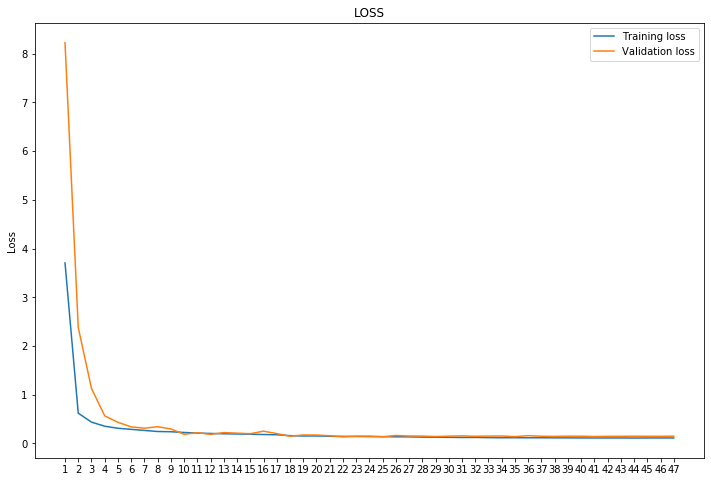

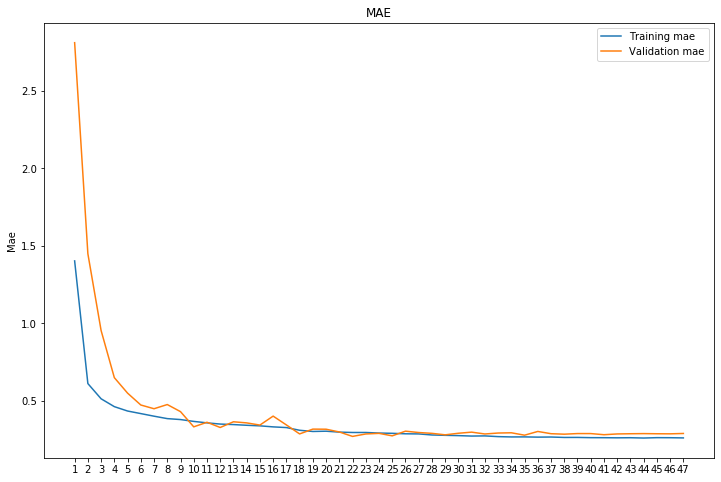

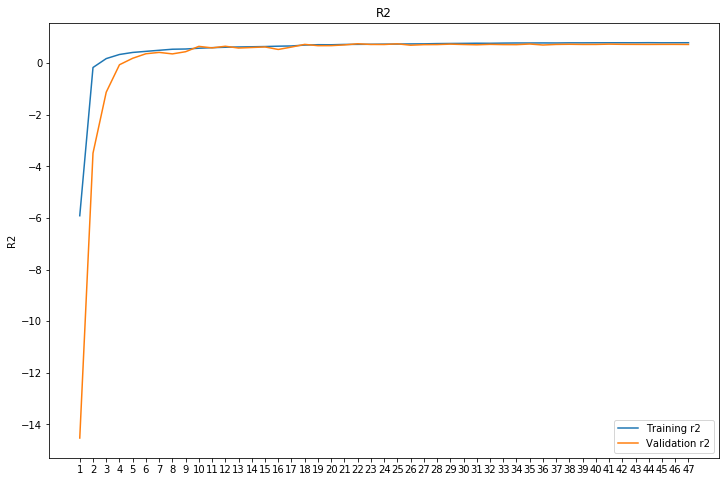

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('LOSS')
plt.plot(epochs, loss)
# plt.ylim((None, .5))
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

mae = history.history['mae']
val_mae = history.history['val_mae']
plt.figure(figsize=(12,8))
plt.title('MAE')
plt.plot(epochs, mae)
plt.plot(epochs, val_mae)
plt.xticks(ticks=epochs)
plt.ylabel('Mae')
plt.legend(['Training mae', 'Validation mae'])
plt.show()


acc = history.history['r2_keras']
val_acc = history.history['val_r2_keras']
plt.figure(figsize=(12,8))
plt.title('R2')
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=epochs)
plt.ylabel('R2')
# plt.ylim((.6, None))
plt.legend(['Training r2', 'Validation r2'])
plt.show()

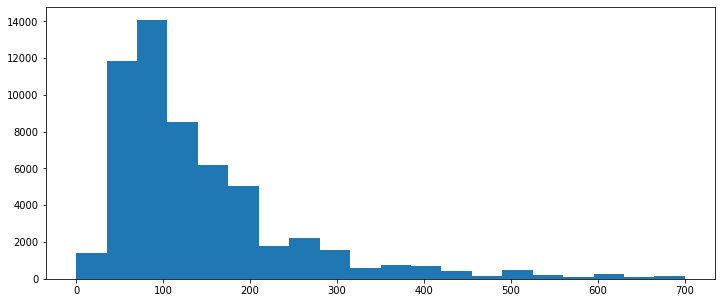

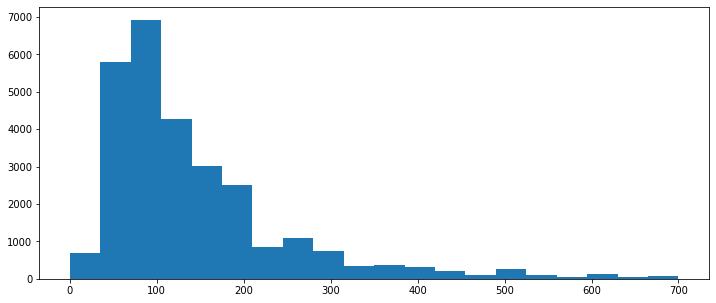

In [45]:
plt.figure(figsize=(12,5))
plt.hist(train_targets, bins=20, range=(0, 700))
plt.show()

plt.figure(figsize=(12,5))
plt.hist(validation_targets, bins=20, range=(0, 700))
plt.show()

In [46]:
history.history['mae'][-1]
# 66.35355
# 66.218636
# 59.322807
# 65.16372
# 68.29044
# 50.142715

0.26154155

In [47]:
y_predicted = model.predict(train_data)
y_predicted = np.exp(y_predicted)

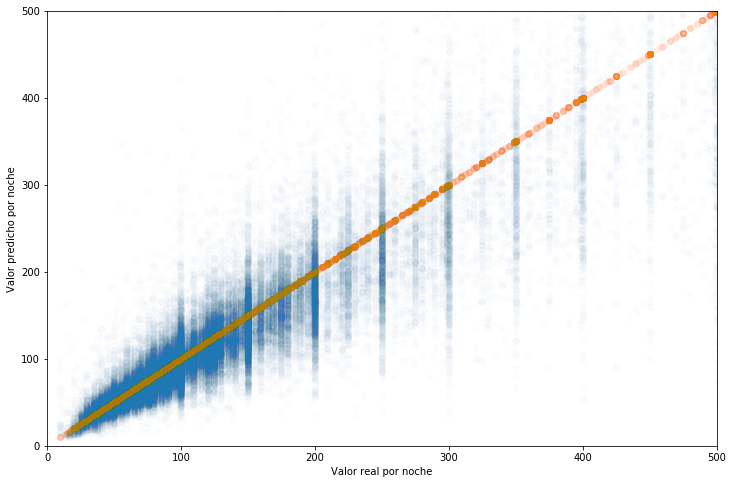

In [48]:
plt.figure(figsize=(12,8))
#plt.scatter(train_targets, np.exp(y_predicted), alpha=.01)
plt.scatter(train_targets, y_predicted, alpha=.01)
plt.scatter(train_targets, train_targets, alpha=.01)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')

lims = (0, 500)
plt.xlim(lims)
plt.ylim(lims)
plt.show()

In [49]:
from sklearn.metrics import r2_score
y_predicted = np.exp(y_predicted)
y_predicted[y_predicted == -np.inf] = 0
y_predicted[y_predicted == np.inf] = 0
r2_score(train_targets, y_predicted)

-1.1895490615229182e+70

In [50]:
y_test_predicted = model.predict(validation_data)
y_test_predicted=np.exp(y_test_predicted)
y_test_predicted[y_test_predicted == -np.inf] = 0
y_test_predicted[y_test_predicted == np.inf] = 0
r2_score(validation_targets, y_test_predicted)

0.7046268650710285

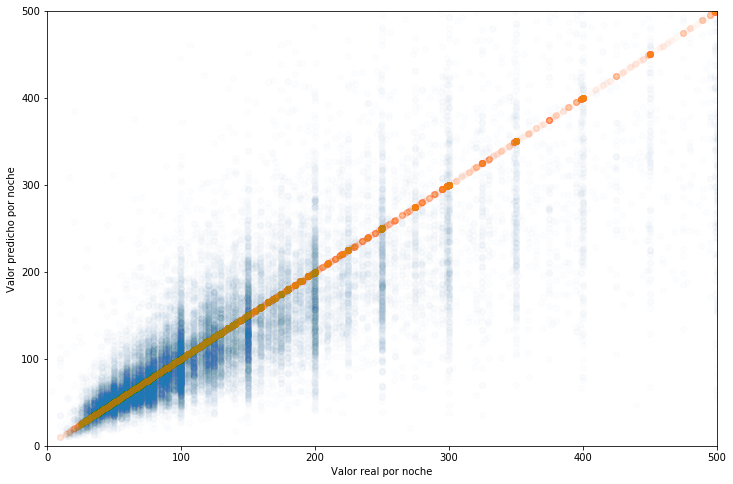

In [51]:
plt.figure(figsize=(12,8))
#plt.scatter(train_targets, np.exp(y_predicted), alpha=.01)
plt.scatter(validation_targets, y_test_predicted, alpha=.01)
plt.scatter(validation_targets, validation_targets, alpha=.01)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')

lims = (0, 500)
plt.xlim(lims)
plt.ylim(lims)
plt.show()